In [1]:
import tensorflow as tf
print ('TesnsorFlow version:', tf.__version__)
print ('Keras version: ', tf.keras.__version__)

TesnsorFlow version: 1.13.1
Keras version:  2.2.4-tf


In [2]:
NW_MobileNetV2        = r"""mnetV2.h5"""
NW_MobileNetV2_Tflite = r"""mnetV2.tflite"""

In [3]:
# This will download a new version of MobileNet when invoked for the first time
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions
model_mnet = MobileNetV2(weights='imagenet')
model_mnet.save(NW_MobileNetV2)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
converter = None
if (tf.__version__ <= "1.12.0"):
    converter = \
      tf.contrib.lite.TFLiteConverter.from_keras_model_file(NW_MobileNetV2)
else:
    converter = \
      tf.lite.TFLiteConverter.from_keras_model_file(NW_MobileNetV2)      

tfmodel   = converter.convert()
try:
    fd = open(NW_MobileNetV2_Tflite, "wb")
    fd.write(tfmodel)
    fd.flush()
    fd.close()
except:
    print("Error in file i/o: ", e)

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 262 variables.
INFO:tensorflow:Converted 262 variables to const ops.


In [5]:
ls *.h5 *.tflite

 Volume in drive E is 3TB
 Volume Serial Number is 3E1D-9902

 Directory of E:\author\GHrepo\Hands-On-Deep-Learning-for-Mobile\Chapter3


 Directory of E:\author\GHrepo\Hands-On-Deep-Learning-for-Mobile\Chapter3

03/16/2019  07:24 AM        17,275,152 first_network.h5
03/16/2019  07:24 AM        16,897,156 first_network.tflite
03/17/2019  04:13 AM        14,627,280 mnetV2.h5
03/17/2019  04:13 AM        13,973,776 mnetV2.tflite
               4 File(s)     62,773,364 bytes
               0 Dir(s)  2,694,886,592,512 bytes free


Image attribution: H. Krisp [CC BY 3.0 (https://creativecommons.org/licenses/by/3.0)]
File URL https://upload.wikimedia.org/wikipedia/commons/9/9e/Mamba_Dendroaspis_angusticeps.jpg


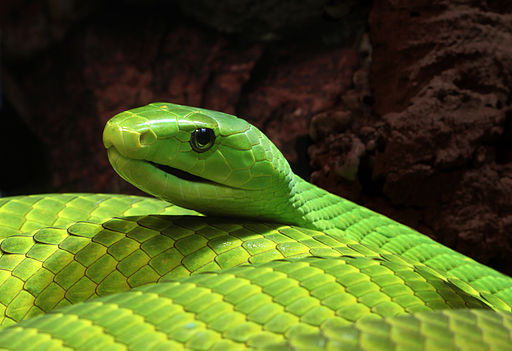


Highest Probability Label ID from Inference:  64
Probability of Label ID:  0.83143544
Latency:  84.9146842956543 ms


In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

from PIL import Image
from IPython.display import display
import numpy as np
import time

print("Image attribution: H. Krisp [CC BY 3.0 (https://creativecommons.org/licenses/by/3.0)]")
print("File URL https://upload.wikimedia.org/wikipedia/commons/9/9e/Mamba_Dendroaspis_angusticeps.jpg")
img = Image.open('Ch3data\mamba.jpg')
display(img)

img_path = 'Ch3data\mamba.jpg'
img      = image.load_img(img_path, target_size=(224, 224))
pre_processed_img = image.img_to_array(img)
pre_processed_img = np.expand_dims(pre_processed_img, axis=0)
pre_processed_img = preprocess_input(pre_processed_img)

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=NW_MobileNetV2_Tflite)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']

input_data = pre_processed_img
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
interpreter.invoke()

start = time.time()
interpreter.invoke()
end = time.time()
output_data = interpreter.get_tensor(output_details[0]['index'])

print ("\nHighest Probability Label ID from Inference: ", np.argmax(output_data[0]))
print ("Probability of Label ID: ", output_data[0][np.argmax(output_data[0])])
print ("Latency: ", (end - start)*1000, "ms")

